# Aplicação de modelo de clustering para classificação de partidos políticos

### 1. Introdução

O objetivo deste projeto é aplicar um modelo de clustering (um método de aprendizado de máquina não supervisionado) para agrupar os partidos políticos em grupos de acordo com as similaridades dos votos dos deputados federais vinculados ao partido.


O clustering é um tipo de modelo de unsupervised machine-learning para classificação dos dados em grupos, ou clusters, com base em suas características. O termo "unsupervised" se deve ao fato de que para aplicar um modelo de clustering não é necessário treinar o modelo com dados pré-classificados para que o modelo "aprenda". Ao invés disse o modelo identifica os padrões e classifica os dados sem que receba nenhum treinamento prévio.

Nesse projeto utilizarei dados obtidos no kaggle, que por sua vez foram obtidos através de web scrapping feito pelo usuário Irio Muskopf. O dataset pode ser encontrado no seguinte endereço: https://www.kaggle.com/iriomk/brazilian-federal-legislative-activity

### 2. Importação das bibliotecas e exploração inicial do dataset

O dataset que vamos utilizar (_'chamber_of_deputies_votes_congresspeople'_) contém informações dos votos dos deputados federais para diversas sessões realizadas no congresso brasileiro entre 1991 e 2015.

As principais colunas do dataset são:

  1. "party" com o partido do deputado
  2. "vote" com o voto dado pelo deputado na sessão
  3. "term" com o ano em que foi realizada a sessão
  4. "session_number" com o número da sessão naquele ano

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
votes = pd.read_csv('chamber_of_deputies_votes_congresspeople.csv')

In [3]:
votes.head(3)

,name,vote,party,state,congressperson_id,term,body,legislative_schedule,legislative_session_number,schedule,session_number
0,CARLOS ANDRADE,no,PHS,Roraima,3.0,2015,chamber_of_deputies,ordinary_session,1,ordinary_session,70
1,EDIO LOPES,no,PMDB,Roraima,2.0,2015,chamber_of_deputies,ordinary_session,1,ordinary_session,70
2,HIRAN GONÇALVES,no,PMN,Roraima,4.0,2015,chamber_of_deputies,ordinary_session,1,ordinary_session,70


In [4]:
votes.isnull().sum()

name                               0
vote                               1
party                              1
state                              1
congressperson_id             262890
term                               0
body                               0
legislative_schedule               0
legislative_session_number         0
schedule                           0
session_number                     0
dtype: int64

In [5]:
votes.dtypes

name                           object
vote                           object
party                          object
state                          object
congressperson_id             float64
term                            int64
body                           object
legislative_schedule           object
legislative_session_number      int64
schedule                       object
session_number                  int64
dtype: object

### 3. Data cleaning
Nesta etapa vamos limpar, tratar, filtrar e agrupar os dados antes de passá-los em nosso modelo de clustering.

**3.1. Apagando colunas desnecessárias**

In [6]:
votes = votes.drop(columns = ['body','legislative_schedule','schedule','state','legislative_session_number'])
votes.head(3)

,name,vote,party,congressperson_id,term,session_number
0,CARLOS ANDRADE,no,PHS,3.0,2015,70
1,EDIO LOPES,no,PMDB,2.0,2015,70
2,HIRAN GONÇALVES,no,PMN,4.0,2015,70


**3.2. Corrigindo os nomes dos partidos**

In [7]:
partidos = set(votes.party)
partidos

{'Avante',
 'DEM',
 'PAN',
 'PCB',
 'PCdoB',
 'PDC',
 'PDS',
 'PDT',
 'PEN',
 'PFL',
 'PHDBS',
 'PHS',
 'PL',
 'PMB',
 'PMDB',
 'PMN',
 'PMR',
 'PODE',
 'PP',
 'PPB',
 'PPL',
 'PPR',
 'PPS',
 'PR',
 'PRB',
 'PRN',
 'PRONA',
 'PROS',
 'PRP',
 'PRS',
 'PRTB',
 'PSB',
 'PSC',
 'PSD',
 'PSDB',
 'PSDC',
 'PSL',
 'PSOL',
 'PST',
 'PSTU',
 'PT',
 'PTB',
 'PTC',
 'PTN',
 'PTR',
 'PTdoB',
 'PV',
 'Podemos',
 'REDE',
 'S.Part',
 'S.Part.',
 'SDD',
 'Solidarie',
 nan,
 'nte  PMDB',
 'nção PMDB',
 'te  PCB',
 'te  PCdoB',
 'te  PDC',
 'te  PDS',
 'te  PDT',
 'te  PFL',
 'te  PL',
 'te  PMDB',
 'te  PMN',
 'te  PP',
 'te  PPR',
 'te  PRN',
 'te  PRONA',
 'te  PRS',
 'te  PSB',
 'te  PSC',
 'te  PSD',
 'te  PSDB',
 'te  PST',
 'te  PT',
 'te  PTB',
 'te  PTN',
 'te  PTR',
 'te  S.Part',
 'ção PAN',
 'ção PCB',
 'ção PCdoB',
 'ção PDC',
 'ção PDS',
 'ção PDT',
 'ção PFL',
 'ção PL',
 'ção PMDB',
 'ção PMN',
 'ção PP',
 'ção PPB',
 'ção PPR',
 'ção PPS',
 'ção PRN',
 'ção PRONA',
 'ção PRS',
 'ção PSB

In [8]:
votes['party'] = votes['party'].apply(lambda x: str(x).split(" ")[-1])
partidos = set(votes.party)
partidos

{'Avante',
 'DEM',
 'PAN',
 'PCB',
 'PCdoB',
 'PDC',
 'PDS',
 'PDT',
 'PEN',
 'PFL',
 'PHDBS',
 'PHS',
 'PL',
 'PMB',
 'PMDB',
 'PMN',
 'PMR',
 'PODE',
 'PP',
 'PPB',
 'PPL',
 'PPR',
 'PPS',
 'PR',
 'PRB',
 'PRN',
 'PRONA',
 'PROS',
 'PRP',
 'PRS',
 'PRTB',
 'PSB',
 'PSC',
 'PSD',
 'PSDB',
 'PSDC',
 'PSL',
 'PSOL',
 'PST',
 'PSTU',
 'PT',
 'PTB',
 'PTC',
 'PTN',
 'PTR',
 'PTdoB',
 'PV',
 'Podemos',
 'REDE',
 'S.Part',
 'S.Part.',
 'SDD',
 'Solidarie',
 'nan'}

In [9]:
partidos_dict = {"SDD":"Solidariedade","Solidarie":"Solidariedade","S.Part":"sem_partido","S.Part.":"sem_partido","nan":np.nan}

In [10]:
votes['party'] = votes['party'].replace(partidos_dict)

**3.3. Slecionando apenas os anos 2015 e 2011 (anos mais recentes do dataset)**

Esse filtro é interessante pois muitos partidos foram extintos ou mudaram de nome desde 1991.

In [11]:
#Entendendo a quantidade de votos em cada ano
votes['term'].value_counts(dropna = False)

2015    424973
2007    320566
1999    230194
2011    228824
2003    227214
1995    218109
1991     68785
Name: term, dtype: int64

In [12]:
#Entendendo a as colunas "term" e "session_number"
print('ano','min_session','max_session')
for ano in sorted(votes['term'].unique()):
    print(ano,votes['session_number'][votes['term']== ano].min(),votes['session_number'][votes['term']== ano].max())

ano min_session max_session
1991 1 206
1995 1 232
1999 2 263
2003 3 328
2007 2 356
2011 2 418
2015 2 400


In [13]:
votes = votes[(votes['term'] == 2011) | (votes['term'] == 2015)]

**3.4. Criando uma coluna para cada sessão de votos da câmara**

A coluna "session_number" tem valores de 1 418 que "resetam" a cada ano, por isso precisamos concatenar as colunas "term" e "session_number" para conseguirmos um valor único.

In [14]:
#tratando a coluna 'session_number'
votes['session_number'] = votes['session_number'].astype('str')
votes['session_number'] = votes['session_number'].str.zfill(3)

In [15]:
#Criando uma nova coluna
votes['term_session_number'] = votes['term'].astype('str') + "-" + votes['session_number'].astype('str')

In [16]:
#Excluindo as colunas que não precisaremos mais
votes = votes.drop(columns = ['term','session_number'])

**3.5. Tratando a coluna 'vote' com o voto de cada deputado**

Idealmente os votos seriam apenas "yes" ou "no", no entanto, temos diversos valores diferentes dessas duas opções. Dentre eles destaca-se o valor "<------->", que representa 30% dos dados.

In [17]:
#entendendo os valores na coluna vote
votes['vote'].value_counts(dropna = False, normalize = True)

yes            0.361375
<------->      0.302286
no             0.289594
obstruction    0.034806
Presente       0.005199
abstention     0.004717
Art. 17        0.001909
Art.51         0.000073
Ausente        0.000038
NaN            0.000002
Name: vote, dtype: float64

In [18]:
#entendendo a distribuição dos partidos para os valores '<------->'
votes['party'][votes['vote'] == '<------->'].value_counts(normalize=True).head(10)

PMDB    0.139682
PT      0.118360
PSDB    0.098460
PP      0.093025
PR      0.077507
PSD     0.076470
DEM     0.059018
PSB     0.054616
PTB     0.042113
PDT     0.038470
Name: party, dtype: float64

In [19]:
#entendendo a distribuição dos partidos para os valores diferentes de '<------->'
votes['party'][votes['vote'] != '<------->'].value_counts(normalize=True).head(10)

PT      0.143039
PMDB    0.134992
PSDB    0.096231
PP      0.077694
PSD     0.069002
PR      0.068548
PSB     0.063613
DEM     0.050153
PDT     0.041904
PTB     0.037250
Name: party, dtype: float64

In [20]:
#Apesar dos votos "<------>" corresponderem a um percentual grande dos votos,
#como no geral a distribuição dos partidos para esses votos é bem parecida da distribuição dos
#demais votos, vamos desconsiderar as linhas que possuem "<------>" sem que isso
#prejudique a qualidade da nossa análise.
#Vamos considerar apenas os votos 'sim' ou 'não', que correspondem a 65% do dataset.
votes = votes[(votes['vote'] == 'yes') | (votes['vote'] == 'no')]

In [21]:
#Criando duas novas colunas para em função do que foi votado
votes['voted_yes'] = votes['vote'].replace({'yes':1,'no':0})
votes['voted_no'] = votes['vote'].replace({'yes':0,'no':1})

**3.6. Agrupando os votos por partido e por votação**

In [22]:
grouped_votes = votes.pivot_table(['voted_yes','voted_no'],['term_session_number','party'])
grouped_votes

voted_no  voted_yes
term_session_number party                             
2011-002            DEM            0.058824   0.941176
                    PCdoB          0.100000   0.900000
                    PDT            0.062500   0.937500
                    PMDB           0.571429   0.428571
                    PMN            0.500000   0.500000
...                                     ...        ...
2015-400            PTB            0.000000   1.000000
                    PV             0.500000   0.500000
                    Podemos        0.000000   1.000000
                    Solidariedade  0.230769   0.769231
                    sem_partido    0.000000   1.000000

[11379 rows x 2 columns]

In [23]:
grouped_votes = grouped_votes.reset_index(level=['term_session_number', 'party'])
grouped_votes

,term_session_number,party,voted_no,voted_yes
0,2011-002,DEM,0.058824,0.941176
1,2011-002,PCdoB,0.100000,0.900000
2,2011-002,PDT,0.062500,0.937500
3,2011-002,PMDB,0.571429,0.428571
4,2011-002,PMN,0.500000,0.500000
...,...,...,...,...
11374,2015-400,PTB,0.000000,1.000000
11375,2015-400,PV,0.500000,0.500000
11376,2015-400,Podemos,0.000000,1.000000
11377,2015-400,Solidariedade,0.230769,0.769231


In [24]:
#Como a informação da coluna "voted_no" já consta na coluna "voted_yes" (no = 1 - yes) podemos excluí-la
grouped_votes = grouped_votes.drop(columns = 'voted_no')

In [25]:
grouped_votes

,term_session_number,party,voted_yes
0,2011-002,DEM,0.941176
1,2011-002,PCdoB,0.900000
2,2011-002,PDT,0.937500
3,2011-002,PMDB,0.428571
4,2011-002,PMN,0.500000
...,...,...,...
11374,2015-400,PTB,1.000000
11375,2015-400,PV,0.500000
11376,2015-400,Podemos,1.000000
11377,2015-400,Solidariedade,0.769231


In [26]:
pivot_votes = grouped_votes.pivot(index = 'party',columns = 'term_session_number')
pivot_votes.head(5)

voted_yes                                                  \
term_session_number  2011-002 2011-004 2011-005  2011-009  2011-010  2011-011   
party                                                                           
Avante                    NaN      NaN      NaN       NaN       NaN       NaN   
DEM                  0.941176     1.00      1.0  0.333333  1.000000  0.987179   
PCdoB                0.900000     1.00      1.0  0.000000       NaN  1.000000   
PDT                  0.937500     0.96      1.0  0.250000  0.444444  1.000000   
PEN                       NaN     1.00      NaN  1.000000       NaN       NaN   

                                                             ...            \
term_session_number  2011-012  2011-013  2011-014  2011-015  ...  2015-378   
party                                                        ...             
Avante                    NaN       NaN       NaN       NaN  ...  0.444444   
DEM                  1.000000  0.924051  0.419355  0.947368  ...  0.536585   
PCdoB                0.000000  0.033333  1.000000  0.000000  ...  0.473684   
PDT                  0.647059  0.234043  0.930233  0.555556  ...  0.117647   
PEN                       NaN       NaN       NaN       NaN  ...  0.500000   

                                                                              \
term_session_number 2015-379 2015-381 2015-389  2015-390  2015-391  2015-392   
party                                                                          
Avante                   1.0      1.0      0.0  0.583333  0.500000  1.000000   
DEM                      1.0      1.0      0.0  0.777778  0.060000  0.764706   
PCdoB                    1.0      1.0      0.0  0.363636  1.000000  1.000000   
PDT                      1.0      1.0      0.0  0.358974  0.842105  0.956522   
PEN                      1.0      1.0      0.0  0.750000  0.000000  1.000000   

                                                  
term_session_number  2015-394  2015-399 2015-400  
party                                             
Avante                    NaN  0.333333      1.0  
DEM                  0.515152  0.000000      1.0  
PCdoB                0.521739       NaN      1.0  
PDT                  0.551724  0.333333      1.0  
PEN                  0.666667  0.000000      1.0  

[5 rows x 461 columns]

**3.7. Filtrando partidos com muitos valores faltantes**

In [27]:
missing = pivot_votes.isnull().sum(axis = 1)/pivot_votes.shape[1]
missing.sort_values(ascending = False)

party
PPL              0.995662
PODE             0.932755
Avante           0.908894
Podemos          0.872017
PMB              0.735358
sem_partido      0.678959
PSDC             0.674620
PTC              0.611714
REDE             0.603037
PTN              0.555315
PRTB             0.524946
PMN              0.312364
PEN              0.277657
PROS             0.260304
Solidariedade    0.258134
PSL              0.214751
PRP              0.160521
PHS              0.156182
PSOL             0.127983
PTdoB            0.127983
PCdoB            0.069414
PSD              0.045553
PT               0.034707
DEM              0.030369
PPS              0.026030
PSDB             0.023861
PV               0.021692
PRB              0.017354
PSC              0.013015
PTB              0.013015
PDT              0.010846
PR               0.006508
PSB              0.006508
PP               0.006508
PMDB             0.002169
dtype: float64

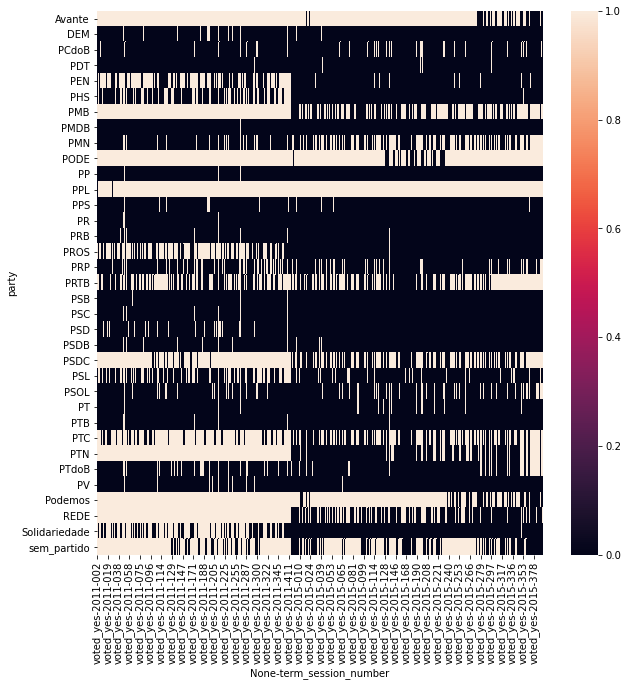

In [28]:
#visualizando graficamente os valores faltantes
plt.figure(figsize = (10,10))
vazio = sns.heatmap(pivot_votes.isnull())

<AxesSubplot:xlabel='None-term_session_number', ylabel='party'>

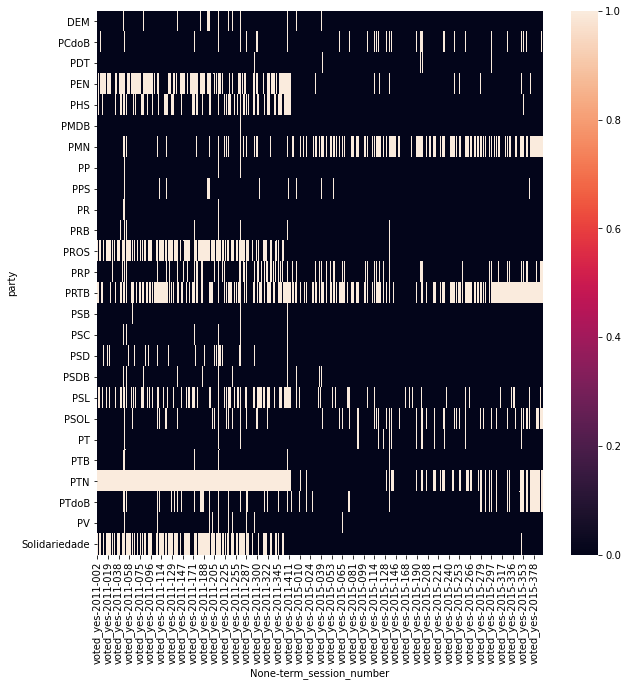

In [29]:
#visualizando graficamente os valores faltantes após filtro
plt.figure(figsize = (10,10))
sns.heatmap(pivot_votes[missing < 0.6].isnull())

In [30]:
pivot_votes = pivot_votes[missing < 0.6]

**3.8. Preenchendo valores faltantes com a média para os demais partidos**

In [31]:
pivot_votes = pivot_votes.fillna(pivot_votes.mean())

### 4. Criando modelo de clustering com KMeans

* Vamos utilizar um modelo de clusterin com KMeans baseado em centróides. As principais etapas do algoritmo de clustering com KMeans são:

  1. Define-se um valor de k = número de clusters que queremos criar (nesse caso, vamos usar 2 clusters, representando a "esquerda" e a "direita"
  2. Defini posições aleatórias para o centro de cada um dos k clusters
  3. Calcula a distância de cada ponto a cada centroide definido na etapa 2
  4. Atribui cada ponto ao cluster mais próximo
  5. Recalcula o novo centroide do cluster como sendo o centro dos pontos que foram atribuídos ao cluster
  6. Repetir as etapas 3, 4 e 5 até que os clusters não se alterem entre cada iteração (indicando convergência)


* A implementação KMeans do sklearn realiza todas essas etapas descritas acima. 

* Como é de se imaginar, os centroides iniciais aleatórios (etapa 2 descrita acima) influenciam muito no resultado final. Para minimizar esse erro, a implementação KMeans do sklearn possui o parâmetro n_init, onde definimos a quantidade de valores iniciais diferentes testadas de forma a minimizar o "bias" nosso modelo. Nesse projeto vamos utilizar n_init = 10. Ou seja, o sklearn vai testar 10 valores iniciais para os centroids e retornar o melhor resultado encontrado.

**4.1 Criando o modelo com k = 2**

In [32]:
#Criando o modelo de clustering com o nosso dataset "pivot_votes" utilizando 2 clusters e 10 iterações
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2,n_init = 10, random_state = 5)

#retorna a distância de cada partido ao centróide de cada um dos clusters
congress_people_distance = kmeans_model.fit_transform(pivot_votes)

**4.2 Visualizando os Clusters**

Os valores nos eixos X e Y não tem um significado pois representam apenas a proximidade de cada ponto com o centro de cada cluster (no caso, "esquerda" e "direita").

O scatter plot deve ser interpretado apenas analisando a distância relativa entre os pontos: Quanto mais próximos os pontos, mais similares foram os votos dos partidos.

As cores dos pontos, por sua vez, indicam em qual cluster eles foram alocados pelo modelo.

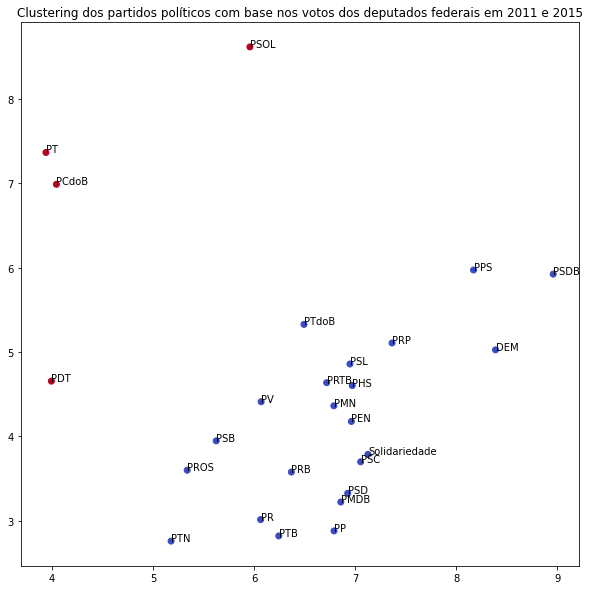

In [33]:
#Retorna os labels definidos pelo modelo (nesse caso, 0 ou 1)
labels = kmeans_model.labels_ 

x = congress_people_distance[:,0] #distância em relação ao primeiro cluster
y = congress_people_distance[:,1] #distância em relação ao segundo cluster

fig1 = plt.figure(figsize = (10,10))
ax1 = fig1.add_subplot(1,1,1)
ax1.scatter(y,x,c = labels, cmap = 'coolwarm')
#ax1.tick_params(bottom=False,left = False,labelbottom=False,labelleft = False)
ax1.set_title("Clustering dos partidos políticos com base nos votos dos deputados federais em 2011 e 2015")

for i, partido in enumerate(np.array(pivot_votes.index)):
    ax1.annotate(partido, (y[i], x[i]))
    
plt.savefig('clustering_partidos')

**4.3 Tentativa de modelo com k = 3**

O excesso de partidos "de direita" com poucos partidos "de esquerda" pode indicar que, na verdade a premissa de utilizar k=2 não foi tão acertada, e que k = 3 faria mais sentido.

In [49]:
kmeans_model_ = KMeans(n_clusters=3,n_init = 10, random_state = 5)
congress_people_distance_ = kmeans_model_.fit_transform(pivot_votes)
pivot_votes['label'] = kmeans_model_.labels_

In [50]:
pivot_votes[['label']]

,label
term_session_number,
party,
DEM,1
PCdoB,0
PDT,0
PEN,2
PHS,2
PMDB,2
PMN,2
PP,2


In [70]:
print("Partidos de esquerda",pivot_votes[pivot_votes['label'] == 0].index.values)

Partidos de esquerda ['PCdoB' 'PDT' 'PSOL' 'PT']


In [71]:
print("Partidos de direita",pivot_votes[pivot_votes['label'] == 1].index.values)

Partidos de esquerda ['DEM' 'PPS' 'PSDB' 'Solidariedade']


In [73]:
print("Partidos de centro",pivot_votes[pivot_votes['label'] == 2].index.values)

Partidos de centro ['PEN' 'PHS' 'PMDB' 'PMN' 'PP' 'PR' 'PRB' 'PROS' 'PRP' 'PRTB' 'PSB' 'PSC'
 'PSD' 'PSL' 'PTB' 'PTN' 'PTdoB' 'PV']
